<a href="https://colab.research.google.com/github/kojikoji19780303/Cry_baby/blob/master/DAY10_%E3%82%A2%E3%83%A4%E3%83%A1%E3%81%AE%E5%88%86%E6%9E%90_%E8%AA%B2%E9%A1%8C%E6%8F%90%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 【問題１】データの取得
# ライブラリのインポート
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# データの内容を確認する
data = load_iris()
data #dataとtargetの２つの配列があることがわかる

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
# 説明変数をデータフレームにする
df_x = pd.DataFrame(data.data)
df_x

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# 列名を変更する
df_x.columns = ["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]
df_x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# 目的変数をデータフレームにする
df_t = pd.DataFrame(data.target)
df_t

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [6]:
# 目的変数の列名をつける
df_t.columns = ["Species"]
df_t

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [7]:
# df_xとdf_tを結合する
df_con = pd.concat([df_x,df_t],axis=1)
df_con

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


【問題3】データの確認

➀先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）

②ラベルごとのサンプル数の合計を出力する。

③特徴量に欠損値があるかを確認する。

④特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [8]:
# ①
df_con.head(4)
# すべて数値データ

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [9]:
# ②
df_con.count()
# すべて150データ

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
Species              150
dtype: int64

In [10]:
#　目的変数の種類とデータ数を確認する
df_con["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [11]:
# ③
df_con.isnull().sum(axis = 0)
# axis=0 を指定することで、列の欠損値データ数がわかる

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [12]:
# ④
df_con.describe()
#　大きな外れ値はなさそう

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


【問題4】irisデータセット自体の調査

In [13]:
# 統計学者ロナルドフィッシャーが1936年に発表した論文[1]で使用されたデータである。
# 種類を分類する線形判別モデルを適用した。
# データを集めたのは植物学者のエドガーアンダーソンである。

【問題5】必要なデータを抽出

sepal_widthの列を３つの異なる方法で抽出する

50番目から99番目までのデータを抽出する

petal_lengthの列の50番目から99番目までのデータを抽出する

petal_widthの値が0.2のデータを抽出する

In [14]:
# sepal_widthの列を３つの異なる方法で抽出する
df_con["sepal width (cm)"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [15]:
df_con.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [16]:
df_con.loc[:,"sepal width (cm)"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [17]:
# 50番目から99番目までのデータを抽出する
df_con.iloc[50:100,:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [18]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
df_con.iloc[50:100,2]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal length (cm), dtype: float64

In [19]:
# petal_widthの値が0.2のデータを抽出する
df_con[df_con["petal width (cm)"]==0.2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


【問題6】図の作成

ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する


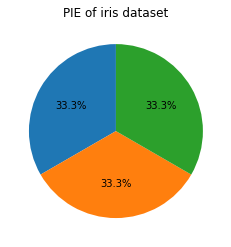

In [24]:
# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
label_counts = df_con['Species'].value_counts()
plt.title('PIE of iris dataset')
plt.pie(label_counts, startangle=90, autopct="%1.1f%%")
plt.show()
# labels はラベル名の表示
# startangle=90 はスタート位置。
# autopct=%1.1f%%”はパーセント表示

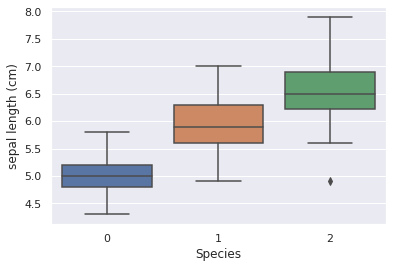

In [26]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
import seaborn as sns # seabornを使用した
sns.set() # 未調査
sns.boxplot(x="Species", y="sepal length (cm)", data=df_con) # xにラベル、yに特徴量を入れる

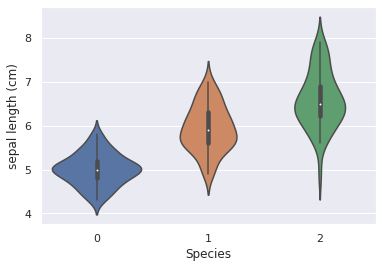

In [27]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
sns.violinplot(x="Species", y="sepal length (cm)", data=df_con) # xにラベル、yに特徴量を入れる

In [ ]:
#「箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。」
# 箱ひげ図は四分位がや外れ値が見やすい。その代わり分布具合がわからない。
# バイオリン図はこの分布具合がわかるが、四分位が分かりにくい。

【問題7】特徴量間の関係の確認

縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

４つの特徴量に関する相関係数行列を作る

相関係数行列のヒートマップを作る

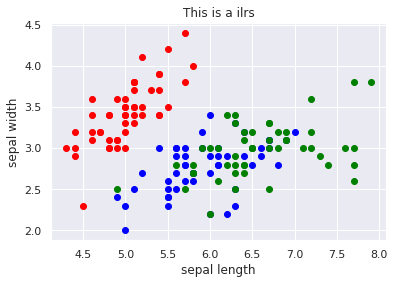

In [28]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
x_0 = df_con[df_con.Species==0].iloc[:, 0]# sepal lengthでラベル０
x_1 = df_con[df_con.Species==1].iloc[:, 0]# sepal lengthでラベル1
x_2 = df_con[df_con.Species==2].iloc[:, 0]# sepal lengthでラベル2

y_0 = df_con[df_con.Species==0].iloc[:, 1]# sepal widthでラベル０
y_1 = df_con[df_con.Species==1].iloc[:, 1]# sepal widthでラベル1
y_2 = df_con[df_con.Species==2].iloc[:, 1]# sepal widthでラベル2

# 散布図を描画
plt.title("This is a ilrs")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.scatter(x_0, y_0, c='red')
plt.scatter(x_1, y_1, c='blue')
plt.scatter(x_2, y_2, c='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

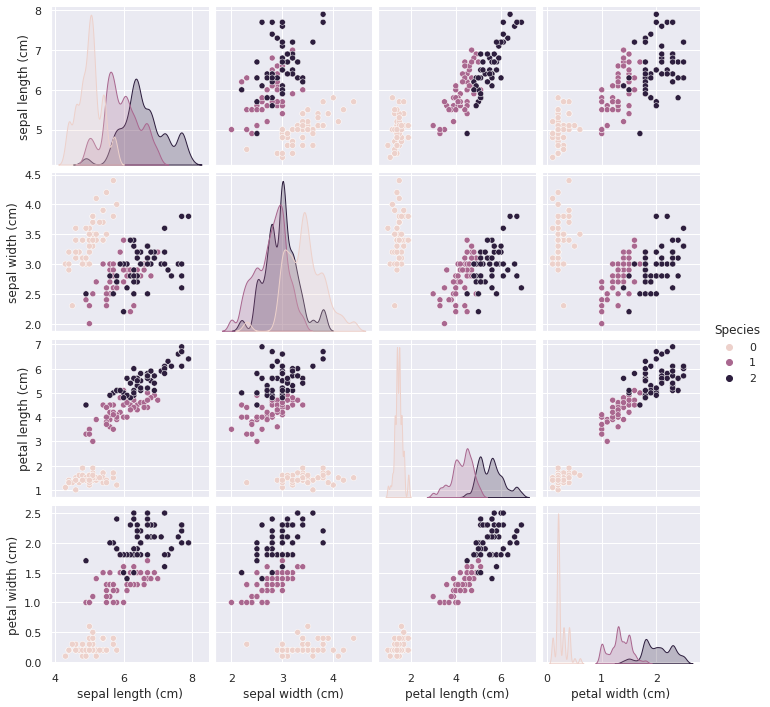

In [30]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
import seaborn as sns 
sns.pairplot(df_con, hue='Species', diag_kws={'bw': 0.2})

In [31]:
# ４つの特徴量に関する相関係数行列を作る
df_con.iloc[:, 0:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


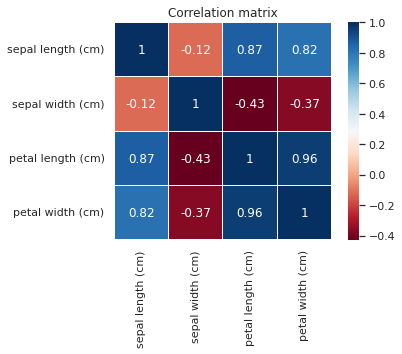

In [32]:
# 相関係数行列のヒートマップを作る
colormap = plt.cm.RdBu
plt.title('Correlation matrix')
sns.heatmap(df_con.iloc[:, 0:4].corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [ ]:
#【問題8】簡単な考察
#相関行列を見ると、petal_wdithとpetal_lengthは相関係数が0.96あり、強い正の相関であった